<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ultimate-Challenge-Part-1" data-toc-modified-id="Ultimate-Challenge-Part-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ultimate Challenge Part 1</a></span></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Exploratory-Data-Analysis-summary" data-toc-modified-id="Exploratory-Data-Analysis-summary-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis summary</a></span></li><li><span><a href="#Ultimate-Challenge-Part-2" data-toc-modified-id="Ultimate-Challenge-Part-2-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ultimate Challenge Part 2</a></span></li><li><span><a href="#Predictive-Modeling-Part-3" data-toc-modified-id="Predictive-Modeling-Part-3-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predictive Modeling Part 3</a></span><ul class="toc-item"><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Data Wrangling</a></span></li><li><span><a href="#Defining-a-retained-Customer" data-toc-modified-id="Defining-a-retained-Customer-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Defining a retained Customer</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Modeling</a></span></li></ul></li><li><span><a href="#Results-and-Conclusions" data-toc-modified-id="Results-and-Conclusions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Results and Conclusions</a></span></li></ul></div>

# Ultimate Challenge Part 1

__Import Library__

In [2]:
import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime as dt
import scipy.stats as stats
from sklearn.preprocessing import RobustScaler
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

__Data Input__

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location.

__Objective__

Aggregate these login counts based on 15minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. 
Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.


# Data Wrangling

In [189]:
# load as Pandas dataframe
logins_df = pd.read_json('logins.json')
logins_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


__Comments__
The login time is not in order

In [190]:
logins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [191]:
# sorting the login time
logins_df_sort = logins_df.sort_values(by=['login_time'])

In [192]:
logins_df_sort.head()

,login_time
6,1970-01-01 20:12:16
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
3,1970-01-01 20:16:36
2,1970-01-01 20:16:37


In [193]:
# The index are in desarray so we will reset
logins_df_sort.reset_index(inplace=True, drop=True)

In [194]:
logins_df_sort.head(10)

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37
5,1970-01-01 20:21:41
6,1970-01-01 20:26:05
7,1970-01-01 20:26:21
8,1970-01-01 20:31:03
9,1970-01-01 20:34:46


In [195]:
# to simplify names and keep a copy for a later use
data = logins_df_sort.copy()

In [196]:
data.head()

,login_time
0,1970-01-01 20:12:16
1,1970-01-01 20:13:18
2,1970-01-01 20:16:10
3,1970-01-01 20:16:36
4,1970-01-01 20:16:37


In [197]:
# Make the login_time as index 
data.set_index('login_time', inplace=True)

In [198]:
data.head()

""
login_time
1970-01-01 20:12:16
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:36
1970-01-01 20:16:37


In [199]:
# make a new column for couting
data['count']=1

In [160]:
# Resampling the data every 15 min
data_15= data.resample("15T").count()

In [134]:
data_15.head(10)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [161]:
# Resampling the data every 15 min
data_h= data.resample("H").count()

In [162]:
data_h.head()

,count
login_time,
1970-01-01 20:00:00,24
1970-01-01 21:00:00,9
1970-01-01 22:00:00,21
1970-01-01 23:00:00,58
1970-01-02 00:00:00,53


In [173]:
# Resampling the data every day
data_d= data.resample("d").count()

In [174]:
data_d.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [163]:
# Resampling the data every 15 min
data_w= data.resample("w").count()

In [164]:
data_w.head()

,count
login_time,
1970-01-04,2374
1970-01-11,5217
1970-01-18,5023
1970-01-25,4751
1970-02-01,4744


In [165]:
# Resampling the data every 15 min
data_m= data.resample("m").count()

In [166]:
data_m.head()

,count
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


# EDA

In [135]:
y=data_15['count']

<AxesSubplot:xlabel='login_time'>

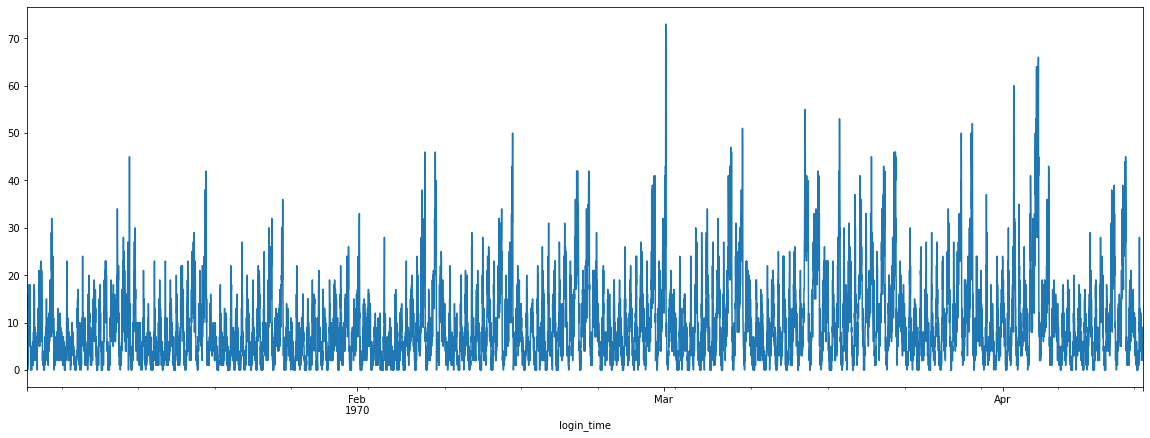

In [138]:
plt.rcParams['figure.figsize'] = [20, 7]
y.plot()

In [175]:
d=data_d['count']

<AxesSubplot:xlabel='login_time'>

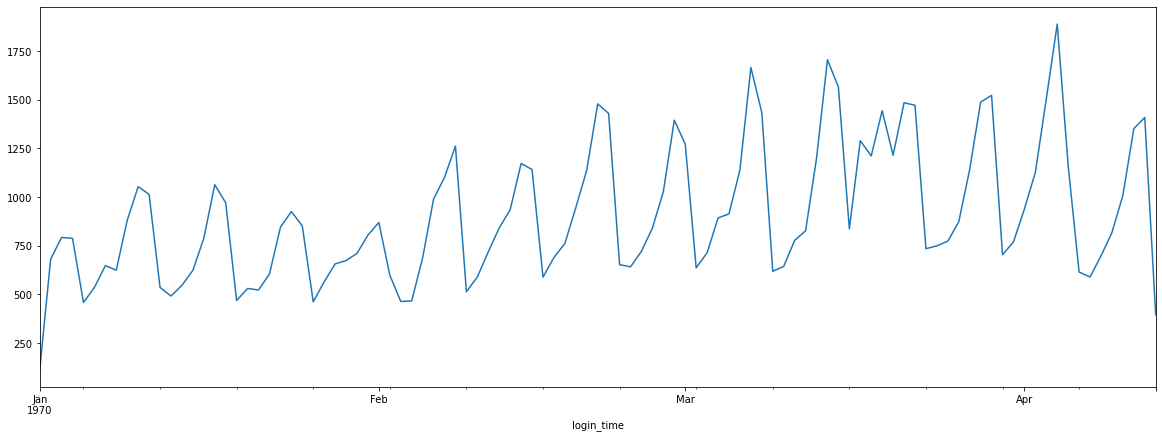

In [176]:
plt.rcParams['figure.figsize'] = [20, 7]
d.plot()

In [177]:
w=data_w['count']

<AxesSubplot:xlabel='login_time'>

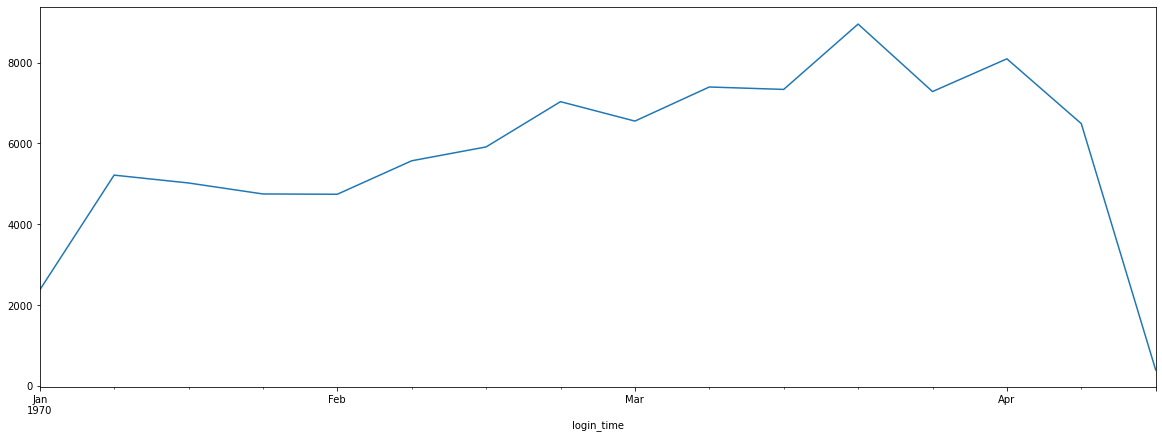

In [178]:
plt.rcParams['figure.figsize'] = [20, 7]
w.plot()

__Comments__

The display using time series in this case doesn't help us to find patterns.

__Testing for Stationary__

In [139]:
from statsmodels.tsa.stattools import adfuller
adfuller_result = adfuller(data_15['count'])
print('ADF Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])

ADF Statistic:  -10.337954309060438
p-value:  2.732396654223123e-18


__Comments__

The results of the ADF Statistics shows a low P-value so the data is stationary

__Another approach__

In [179]:
# reset index
data_15.reset_index(inplace=True)

In [180]:
data_15.head()

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


In [181]:
data_15.tail()

,login_time,count
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7
9787,1970-04-13 18:45:00,6


In [182]:
# Add 3 columns with the hour, day, month
data_15['Hour'] = data_15['login_time'].dt.hour
data_15['Day'] = data_15['login_time'].dt.day_name()
data_15['Month']=data_15['login_time'].dt.month_name()

In [183]:
data_15.head()

,login_time,count,Hour,Day,Month
0,1970-01-01 20:00:00,2,20,Thursday,January
1,1970-01-01 20:15:00,6,20,Thursday,January
2,1970-01-01 20:30:00,9,20,Thursday,January
3,1970-01-01 20:45:00,7,20,Thursday,January
4,1970-01-01 21:00:00,1,21,Thursday,January


[Text(0.5, 1.0, 'Average Logins per Hour for different days of the week')]

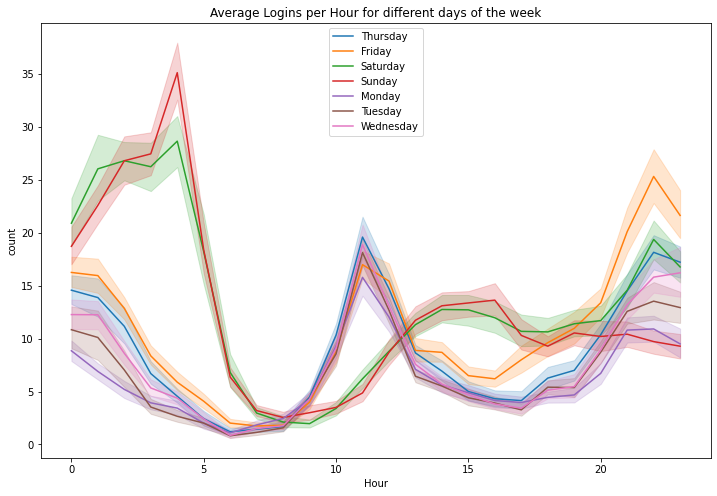

In [184]:
# plot the average counts for each hour for different days

f, axes = plt.subplots(figsize=(12,8))
ax = sns.lineplot(x="Hour", y="count", data=data_15, hue="Day")
ax.legend(loc="upper center")
ax.set(title="Average Logins per Hour for different days of the week")

__Comments__

During the Weekend (Saturday and Sunday) the login hour peaks is around 4:30 am and the lowest time is between 7-9am.
For the week the peak time is around 11 am and the lowest around 6 am.
Late nights after 10 pm the login counts are simirlar for both weekend and week, except for Friday that show a significant increment.

[Text(0.5, 1.0, 'Average Logins per day for different Months')]

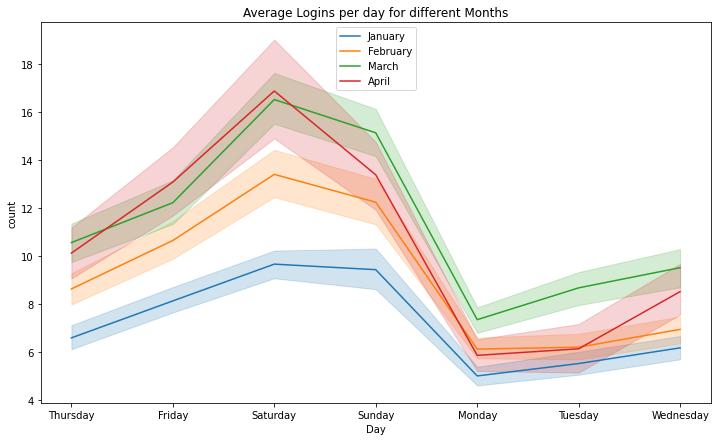

In [187]:
# plot the average counts for each hour for different days
f, axes = plt.subplots(figsize=(12,7))
ax = sns.lineplot(x="Day", y="count", data=data_15, hue="Month")
ax.legend(loc="upper center")
ax.set(title="Average Logins per day for different Months")

__Comments__

January in average has the lowest logins in comparison with all the other months.
The peaks in logins are on the weekends for all months.


[Text(0.5, 1.0, 'Average Logins per Month for different days of the week')]

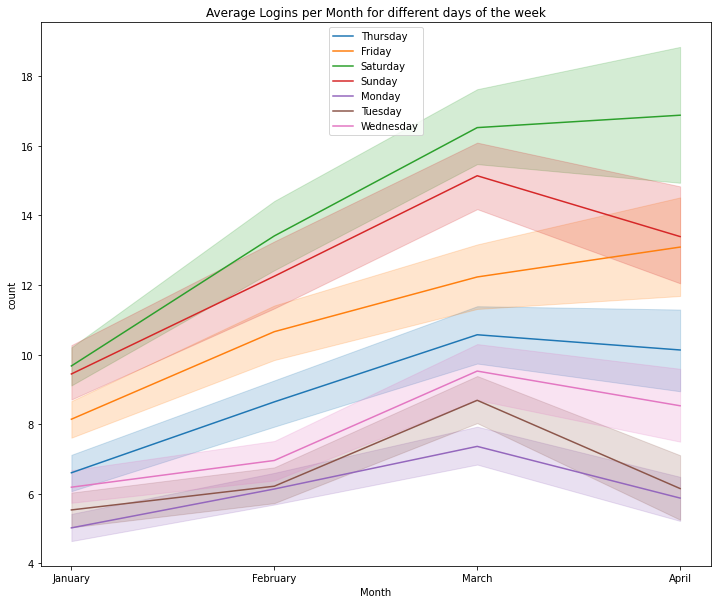

In [188]:

f, axes = plt.subplots(figsize=(12,10))
ax = sns.lineplot(x="Month", y="count", data=data_15, hue="Day")
ax.legend(loc="upper center")
ax.set(title="Average Logins per Month for different days of the week")

__Comments__

The month that in average shows higher logins is March, the Lowest is January.
Saturday is the day with most logins in all Months.

# Exploratory Data Analysis summary

The results of the ADF Statistics showed a low P-value so the data is stationary.

The display of the regular time series didn't help much in finding patterns but averaging the counts of logins per hour of the day, per day of the week and per day of  the month were very informative.

Based on these plots there are 3 interesting behaviors:

•	Average Logins per Hour for different days of the week showed that during the Weekend (Saturday and Sunday) the login hour peaks is around 4:30 am and the lowest time is between 7-9am. For the weekdays the peak time is around 11 am and the lowest around 6 am. Late nights after 10 pm the login counts are similar for both weekend and week, except for Friday that show a significant increment.

•	Average Logins per day for different Months showed that January in average has the lowest logins in comparison with all the other months. The peaks in logins are on the weekends for all months.

•	Average Logins per Month for different days of the week showed that March has the higher logins and the lowest is January. Saturday is the day with most logins in all Months.




# Ultimate Challenge Part 2

__Overview__

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.

__1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?__
 
The primary metric I would choose is waiting time for the customers and the drivers.
For the customers the waiting time would be the difference between requesting the service and getting picked up, as for the drivers it would be between dropping off one and picking up the next customer outside of their primary city.
 
If the experiment is successful, we should see a decrease in waiting time for both drivers and customers.
 
Looking at the entire perspective it is important to measure the total revenue for the cities before and after the experiment.

__2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:__

__a) how you will implement the experiment__

I would use the A/B testing to implement this experiment.
I would discuss and decide with the city's managers what is the minimum detectable effect to determine the sample size and duration of the experiment. 
In order to have a balanced sample and minimum interference I will use time randomization. For example, I will have the experiment running in alternate weeks where the same drivers will be the control group (paying the toll) one week  and the test group (no paying the toll) next week. To avoid biasing the results, some events such as holidays, extreme weather conditions, etc will be excluded from the experiment. 
During the experiment period we will be calculating the average of waiting time for drivers and customers before and after the experiment.
 
__b) what statistical test(s) you will conduct to verify the significance of the observation__

I would perform a paired t-test, because the two groups come from a single population (e.g measuring before and after the experiment).
The null hypothesis would be that the mean difference on waiting time (before and after the experiment) is 0, the alternative hypothesis would be that the mean difference on waiting time is not 0.
If the p-value is inferior or equal to 0.05, we can conclude that the difference between the two paired samples are significantly different.
 
__c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.__

If the experiment is succesful we should observe a decrease in waiting time for both customers and drivers. If the reduction ocurrs only for the customers this could be a sign of too many drivers. So the implementation of  waiving the toll cost should be strategically done by limiting the times, for example waive the toll only at peak times and weekends where we can have a more balanced proportion of drivers and customers.

A caveat for this experiment would be that if the total revenues for either city after the experiment is lower than before the experiment then I would recommend not implementing the toll waiver as a tool for increasing the income.





# Predictive Modeling Part 3

Part 3 ‐ Predictive modeling Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice). 

Data description

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [3]:
# Read in the json file

openfile = open('ultimate_data_challenge.json')
jsondata = json.load(openfile)
df = pd.DataFrame(jsondata)

openfile.close()

## Data Wrangling

In [5]:
df.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
49999,Astapor,0,2014-01-18,NaN,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [7]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [8]:
df.dtypes

city                       object
trips_in_first_30_days      int64
signup_date                object
avg_rating_of_driver      float64
avg_surge                 float64
last_trip_date             object
phone                      object
surge_pct                 float64
ultimate_black_user          bool
weekday_pct               float64
avg_dist                  float64
avg_rating_by_driver      float64
dtype: object

In [9]:
df.isnull().values.any()

True

In [10]:
# the dates are strings - need to convert to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])

In [11]:
# confirming that the dates are in the datetime format
df.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [12]:
# finding the last trip date
sorted(df.last_trip_date)[-1]


Timestamp('2014-07-01 00:00:00')

## Defining a retained Customer

Retained customers are defined as the customer that were "active" (i.e., took a trip)in the preceding 30 days. 
To be more specific between 2014-06-01 to 2014-07-01

In [13]:
retained_date = pd.to_datetime('2014-06-01')

In [14]:
#Add ret_user Column and assign 1 for the last trip being  later than 06-01 and 0 for the others
df['ret_user'] = df.apply(lambda row: 1 if row['last_trip_date'] > retained_date else 0, axis=1)

In [15]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,ret_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [16]:
# Finding missing values
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['Count', 'percentages' ]
missing.sort_values(by='Count')

,Count,percentages
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000
weekday_pct,0,0.000
avg_dist,0,0.000
ret_user,0,0.000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  ret_user                50000 non-null  int64 

__Handling missing values__

In [18]:
features_fillna_mean = ['avg_rating_by_driver','avg_rating_of_driver']
for feature in features_fillna_mean:
    df[feature].fillna(df[feature].mean(), inplace=True)
df.head(20)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,ret_user
0,King's Landing,4,2014-01-25,4.700000,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.000000,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.300000,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.600000,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.400000,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0
5,Winterfell,2,2014-01-09,3.500000,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0,1
6,Astapor,1,2014-01-24,4.601559,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0,0
7,Winterfell,2,2014-01-28,5.000000,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0,0
8,Winterfell,2,2014-01-21,4.500000,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0,0
9,Winterfell,1,2014-01-03,4.601559,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0,0


In [19]:
# fill the NA's in the 'phone' column with 'Other'
df['phone'] = df['phone'].fillna('Other')

In [20]:
# check for duplicates
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,ret_user
2608,Astapor,1,2014-01-18,5.000000,1.0,2014-01-19,iPhone,0.0,True,0.0,6.25,5.0,0
18057,Astapor,1,2014-01-11,5.000000,1.0,2014-01-11,iPhone,0.0,True,0.0,2.33,5.0,0
29601,Winterfell,1,2014-01-01,4.601559,1.0,2014-01-02,Android,0.0,False,100.0,8.08,5.0,0
34641,Winterfell,1,2014-01-18,4.601559,1.0,2014-01-19,iPhone,0.0,True,0.0,1.44,5.0,0
36627,Winterfell,1,2014-01-18,5.000000,1.0,2014-01-19,Android,0.0,False,0.0,3.54,5.0,0
39601,Winterfell,1,2014-01-10,5.000000,1.0,2014-01-11,Android,0.0,False,100.0,0.00,5.0,0
42025,Winterfell,1,2014-01-18,4.601559,1.0,2014-01-19,Android,0.0,False,0.0,0.01,5.0,0
45416,Astapor,1,2014-01-20,5.000000,1.0,2014-01-20,iPhone,0.0,False,100.0,3.06,5.0,0


__Clasification of Categorical and numerical data__

In [42]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,ret_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


## EDA

In [21]:
# Classifying data into numerical and categorical variables.
df_num=df[['trips_in_first_30_days', 'avg_rating_of_driver',
       'avg_surge', 'surge_pct', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver']]
df_cat=df[['city','phone', 'ultimate_black_user','ret_user' ]]

<AxesSubplot:xlabel='trips_in_first_30_days', ylabel='Count'>

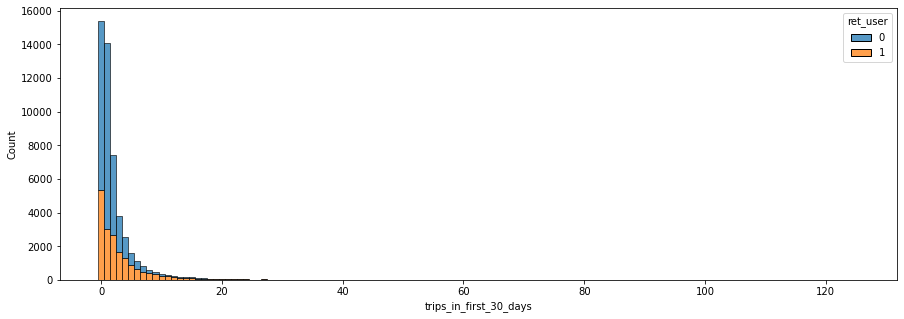

In [67]:
# Plot Histogram
fig = plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'trips_in_first_30_days', hue = 'ret_user', bins=50, discrete = True, multiple="stack")

<AxesSubplot:xlabel='avg_rating_by_driver', ylabel='Count'>

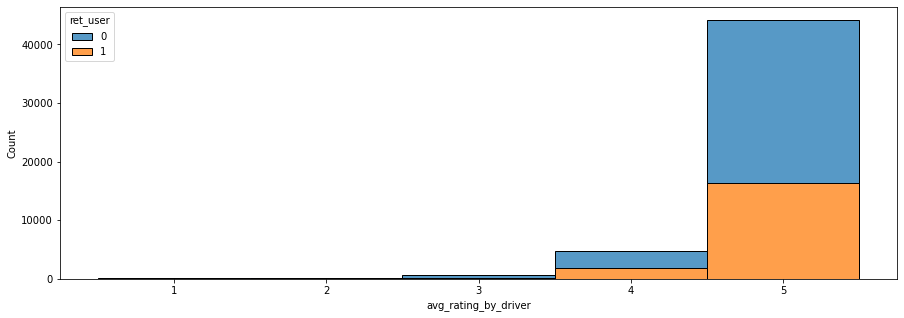

In [66]:
# Plot Histogram
fig = plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'avg_rating_by_driver', hue = 'ret_user', bins=5, discrete = True, multiple="stack")

<AxesSubplot:xlabel='avg_rating_of_driver', ylabel='Count'>

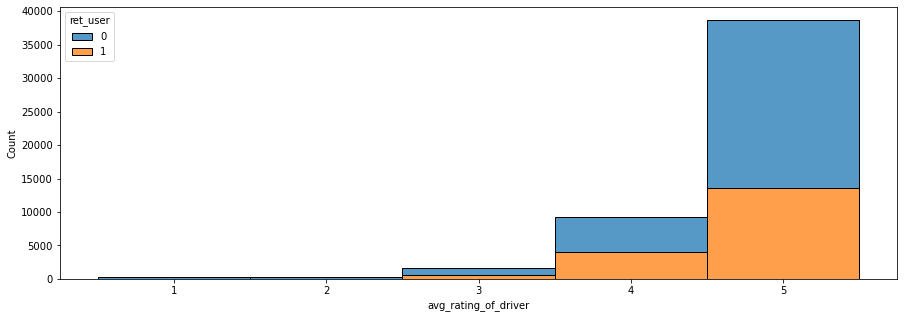

In [63]:
# Plot Histogram
fig = plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'avg_rating_of_driver', hue = 'ret_user', bins=5, discrete = True, multiple="stack")

<AxesSubplot:xlabel='avg_dist', ylabel='Count'>

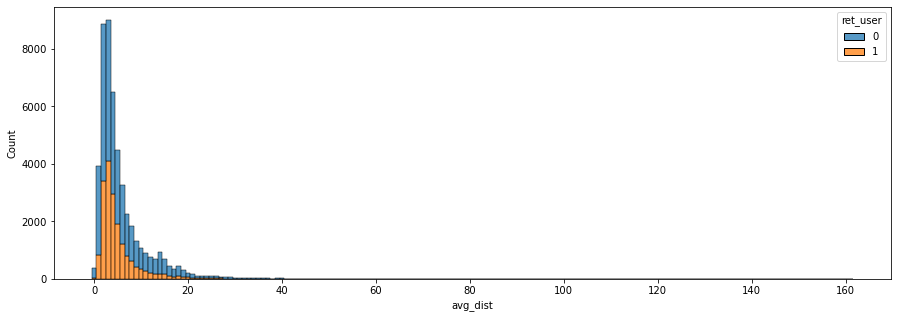

In [65]:
# Plot Histogram
fig = plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'avg_dist', hue = 'ret_user', bins=20, discrete = True, multiple="stack")

<AxesSubplot:xlabel='avg_surge', ylabel='Count'>

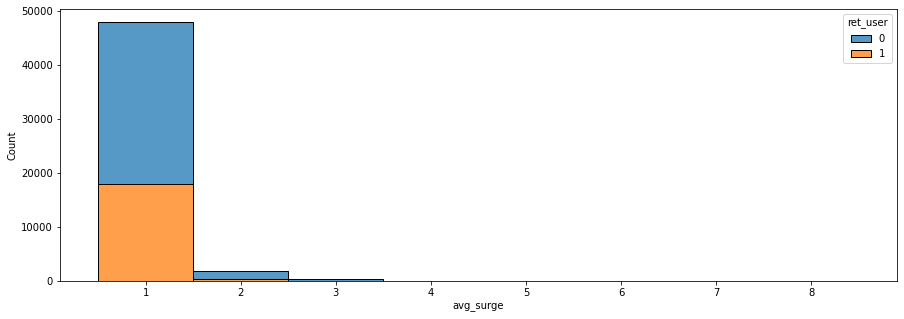

In [58]:
# Plot Histogram
fig = plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'avg_surge', hue = 'ret_user', bins=2, discrete = True, multiple="stack")

<AxesSubplot:xlabel='surge_pct', ylabel='Count'>

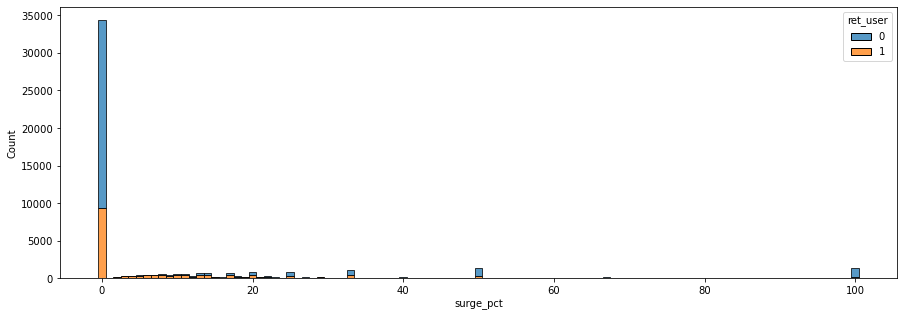

In [61]:
# Plot Histogram
fig = plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'surge_pct', hue = 'ret_user', bins=20, discrete = True, multiple="stack")

<AxesSubplot:xlabel='weekday_pct', ylabel='Count'>

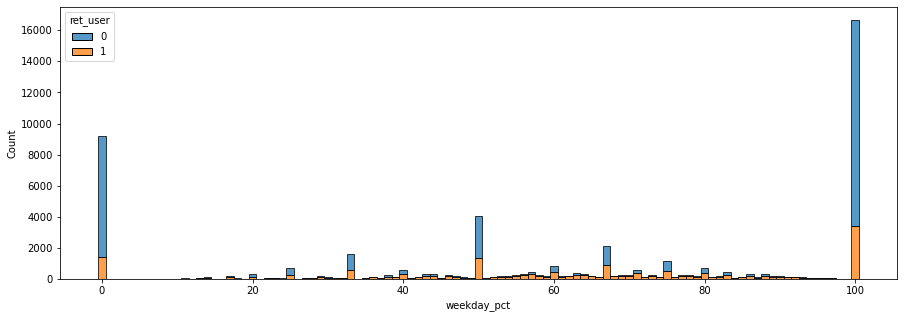

In [62]:
# Plot Histogram
fig = plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'weekday_pct', hue = 'ret_user', bins=20, discrete = True, multiple="stack")

<AxesSubplot:xlabel='signup_date', ylabel='Count'>

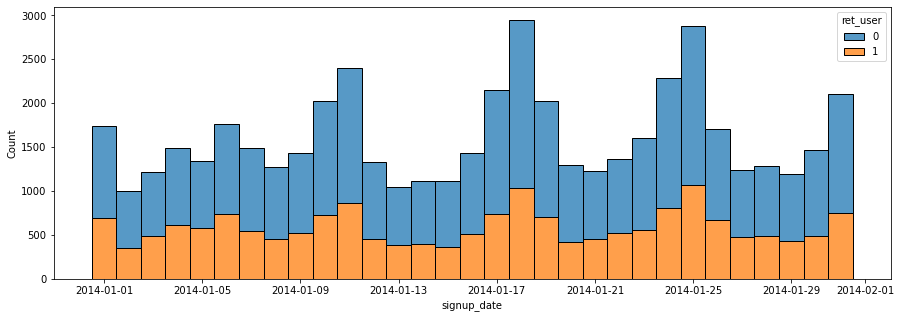

In [71]:
# Plot Histogram
fig = plt.figure(figsize=(15,5))
sns.histplot(data = df, x = 'signup_date', hue = 'ret_user', bins=10, discrete = True, multiple="stack")

__Comments__
The histogram showed the following behavior:

__‘trips_in_first_30_days’__: Have an exponential decay  where, most of the retained customers are in the range of 1-5  trips in the first 30 days after signup.

__‘avg_rating_by_driver’__  Average ratings by driver around 5 showed the most retained customer, ratings of 3 didn’t retain customers. 

__‘avg_rating_of_driver’__ Average ratings of driver showed a little wider retained customers with ratings between 3-5.

__‘avg_distance’__ The average distance shows a peak on retained customers for short distances around 5 miles with exponential decay.

__‘avg_surge’__ The average surge multiplier over all of this user trips was around 1 for retained users.

__‘surge_pct’__ the percent of trips taken with surge multiplier > 1 showed a peak at 0  for retained users with a wide distribution.

__‘weekday_pc’__the percent of the user’s trips occurring during a weekday showed a very wide distribution for retained and no retained users.

__‘signup_date’__ the date of account registration shows some cyclical behavior. There is an increment every 5-7 days that could be weekends for both retained and no retained customers.


__Categorical Data Visualization__

In [72]:
# The target variable is the retained user. Let's chek the distribuition of the target
df['ret_user'].value_counts(normalize=True)

0    0.6338
1    0.3662
Name: ret_user, dtype: float64

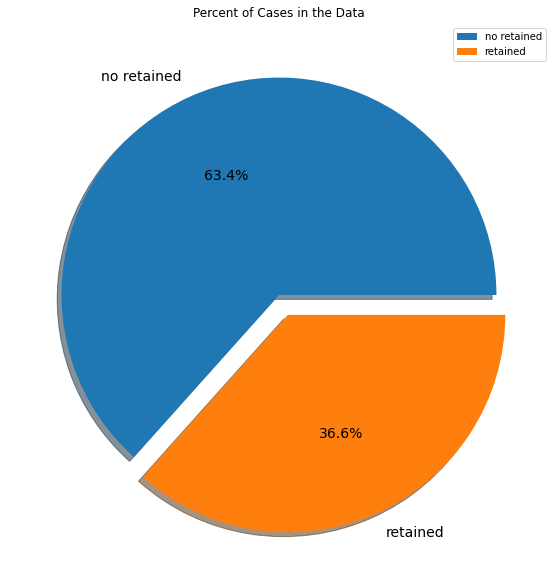

In [91]:
# visuallization of the retained customer distribuition distribuition
# Pie chart representation
pie_labels = ['no retained', 'retained']

#Number of benign and malignant cases
pie_y = df['ret_user'].value_counts()

pie_explode = [0, 0.1]

plt.figure(figsize=(10, 10))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
plt.legend()
plt.title("Percent of Cases in the Data")
plt.show()

In [74]:
print(df['city'].unique())

["King's Landing" 'Astapor' 'Winterfell']


In [92]:
# The target variable is the retained user. Let's chek the distribuition of the target
df['city'].value_counts(normalize=True)

Winterfell        0.46672
Astapor           0.33068
King's Landing    0.20260
Name: city, dtype: float64

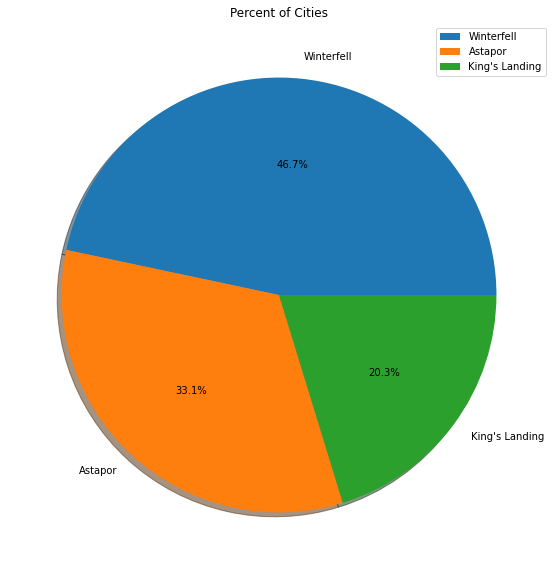

In [94]:
# visuallization of the retained customer distribuition distribuition
# Pie chart representation
pie_labels = ['Winterfell','Astapor', "King's Landing"]

#Number of benign and malignant cases
pie_y = df['city'].value_counts()

pie_explode = [0, 0, 0]

plt.figure(figsize=(10, 10))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 10})
plt.legend()
plt.title("Percent of Cities")
plt.show()

In [50]:
print(df['phone'].unique())

['iPhone' 'Android' 'Other']


In [95]:
# The target variable is the retained user. Let's chek the distribuition of the target
df['phone'].value_counts(normalize=True)

iPhone     0.69164
Android    0.30044
Other      0.00792
Name: phone, dtype: float64

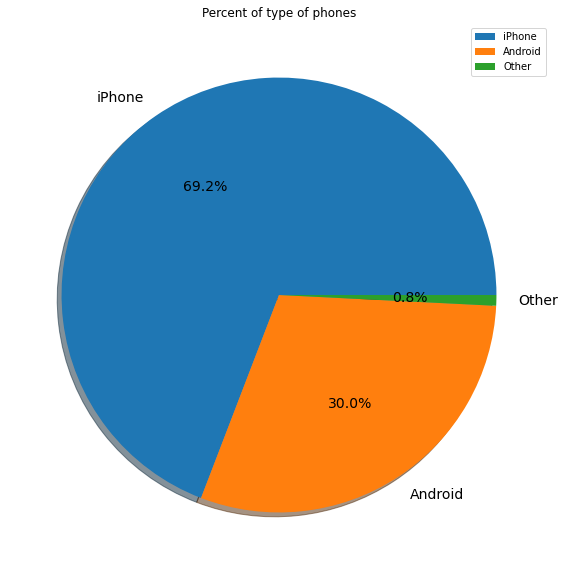

In [51]:
# visuallization of the retained customer distribuition distribuition
# Pie chart representation
pie_labels = ["iPhone", 'Android', 'Other']

#Number of benign and malignant cases
pie_y = df['phone'].value_counts()

pie_explode = [0, 0, 0]

plt.figure(figsize=(10, 10))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
plt.legend()
plt.title("Percent of type of phones")
plt.show()

In [52]:
print(df['ultimate_black_user'].unique())

[ True False]


In [96]:
# The target variable is the retained user. Let's chek the distribuition of the target
df['ultimate_black_user'].value_counts(normalize=True)

False    0.62292
True     0.37708
Name: ultimate_black_user, dtype: float64

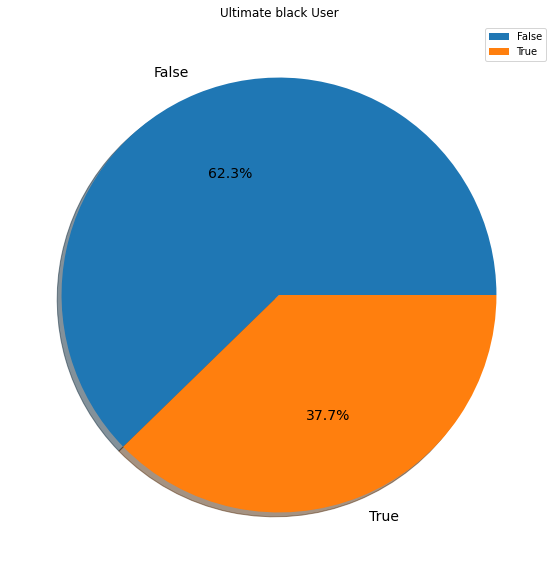

In [97]:
# visuallization of the retained customer distribuition distribuition
# Pie chart representation
pie_labels = ['False', 'True']

#Number of benign and malignant cases
pie_y = df['ultimate_black_user'].value_counts()

pie_explode = [0, 0]

plt.figure(figsize=(10, 10))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
plt.legend()
plt.title("Ultimate black User")
plt.show()

__Comments__

The pie chart representation used for the categorical features showed that a 63.4 percent of the customers were no retained and 36.6 of retained.

The city that has most customers with 46.7 percent is Winterfell  , followed by Astapor with 33.1 and King’s Landing with 20.3 percent.

The iphone has most users with 69.2 percent followed with 30.0 percent Android. The rest has been assigned to other type of phone.

37.7 percent of customers took an Ultimate Black in their first 30 days


In [54]:
# Review the range of values per column
df.describe().T

,count,mean,std,min,25%,50%,75%,max
trips_in_first_30_days,50000.0,2.278200,3.792684,0.0,0.00,1.00,3.00,125.00
avg_rating_of_driver,50000.0,4.601559,0.564977,1.0,4.50,4.70,5.00,5.00
avg_surge,50000.0,1.074764,0.222336,1.0,1.00,1.00,1.05,8.00
surge_pct,50000.0,8.849536,19.958811,0.0,0.00,0.00,8.60,100.00
weekday_pct,50000.0,60.926084,37.081503,0.0,33.30,66.70,100.00,100.00
avg_dist,50000.0,5.796827,5.707357,0.0,2.42,3.88,6.94,160.96
avg_rating_by_driver,50000.0,4.778158,0.445753,1.0,4.70,5.00,5.00,5.00
ret_user,50000.0,0.366200,0.481770,0.0,0.00,0.00,1.00,1.00


In [55]:
print(df.columns)

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'ret_user'],
      dtype='object')


In [76]:
df_copy=df.copy()

In [77]:
df_copy.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,ret_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


__Null Hypothesis__

In [78]:
for col in ['trips_in_first_30_days','avg_surge','avg_dist','avg_rating_of_driver','avg_rating_by_driver','surge_pct','weekday_pct']:

    print(col + ": ", stats.ttest_ind(df_copy[col][(df_copy['ret_user']==1)],df_copy[col][(df_copy['ret_user']==0)], equal_var=True))

trips_in_first_30_days:  Ttest_indResult(statistic=49.16037676270661, pvalue=0.0)
avg_surge:  Ttest_indResult(statistic=-0.7976629373328236, pvalue=0.42506990537480527)
avg_dist:  Ttest_indResult(statistic=-20.26931432895536, pvalue=5.57820384997409e-91)
avg_rating_of_driver:  Ttest_indResult(statistic=-2.2544416371295233, pvalue=0.024172707695368296)
avg_rating_by_driver:  Ttest_indResult(statistic=-5.724932180243631, pvalue=1.0406577680634734e-08)
surge_pct:  Ttest_indResult(statistic=2.3729015491085956, pvalue=0.01765272668993012)
weekday_pct:  Ttest_indResult(statistic=5.908117220213126, pvalue=3.482734989771369e-09)


__Comments__ 
t-test (null hypothesis) showed that avg_surge is statistically no significant for user retention. The P-value is 0.425



In [79]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,ret_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [80]:
df_copy.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,ret_user
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


<AxesSubplot:xlabel='city', ylabel='avg_rating_of_driver'>

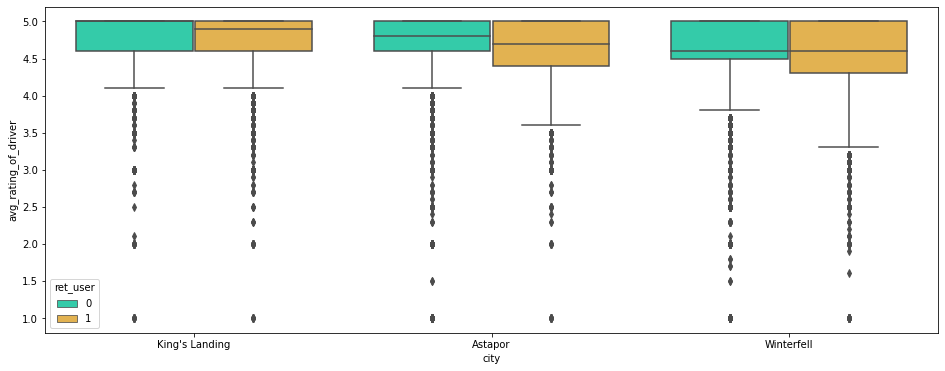

In [85]:
plt.figure(figsize=(16,6))
sns.boxplot(y='avg_rating_of_driver', x='city',hue='ret_user' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='city', ylabel='avg_rating_by_driver'>

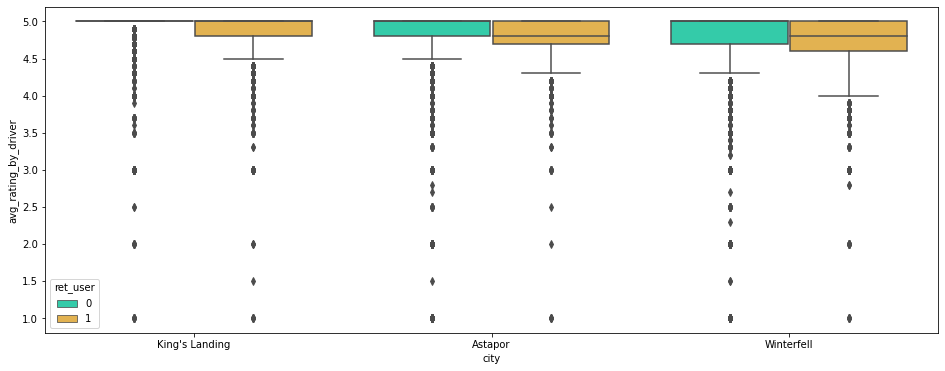

In [86]:
plt.figure(figsize=(16,6))
sns.boxplot(y='avg_rating_by_driver', x='city',hue='ret_user' ,data=df, palette = 'turbo')

<AxesSubplot:xlabel='city', ylabel='trips_in_first_30_days'>

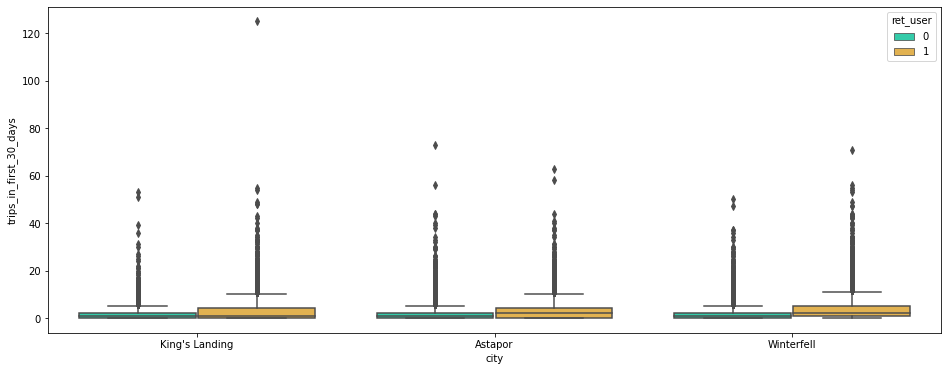

In [87]:
plt.figure(figsize=(16,6))
sns.boxplot(y='trips_in_first_30_days', x='city',hue='ret_user' ,data=df, palette = 'turbo')

__Comments__

From the box plot visualizations was noticed that King’s Landing city had a higher average of user retention based on rating by and of the driver followed by Astafor and Winterfell.

The retention of users appears to be higher for Winterfell based on ‘the trips in first 30 days’.


__Making the categorical data in numerical__

In [106]:
# Label encoding the 'city' column
labelencoder = LabelEncoder()
df['city_N'] = labelencoder.fit_transform(df['city'])

In [107]:
# Label encoding the 'city' column
labelencoder = LabelEncoder()
df['phone_N'] = labelencoder.fit_transform(df['phone'])

In [108]:
# Label encoding the 'city' column
labelencoder = LabelEncoder()
df['ubu_N'] = labelencoder.fit_transform(df['ultimate_black_user'])

In [109]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,ret_user,city_N,phone_N,ubu_N
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,1,2,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,0,0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,0,2,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,1,2,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,2,0,0


In [110]:
# Drop the original 'city' and 'phone', and the datetime columns
new_df = df.drop(['city','phone','signup_date', 'last_trip_date', 'ultimate_black_user'], axis=1)

In [111]:
new_df.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,ret_user,city_N,phone_N,ubu_N
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,2,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,2,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,2,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,2,0,0


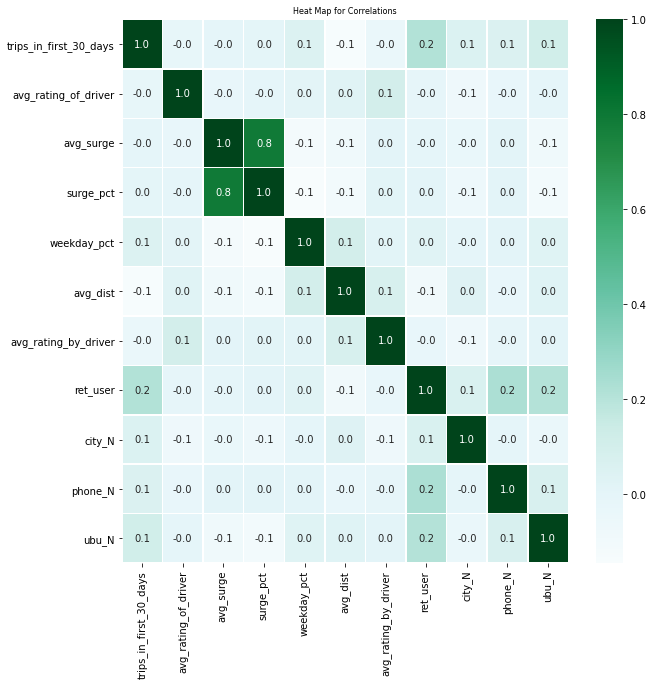

In [112]:
plt.rcParams['figure.figsize'] = (10, 10)

# sns.heatmap(df.corr(), cmap = 'pink', annot = True, linewidths = 0.5, fmt = '.1f')
sns.heatmap(new_df.corr(), cmap = 'BuGn', annot = True, linewidths = 0.5, fmt = '.1f')
plt.title('Heat Map for Correlations', fontsize = 8)
plt.show()

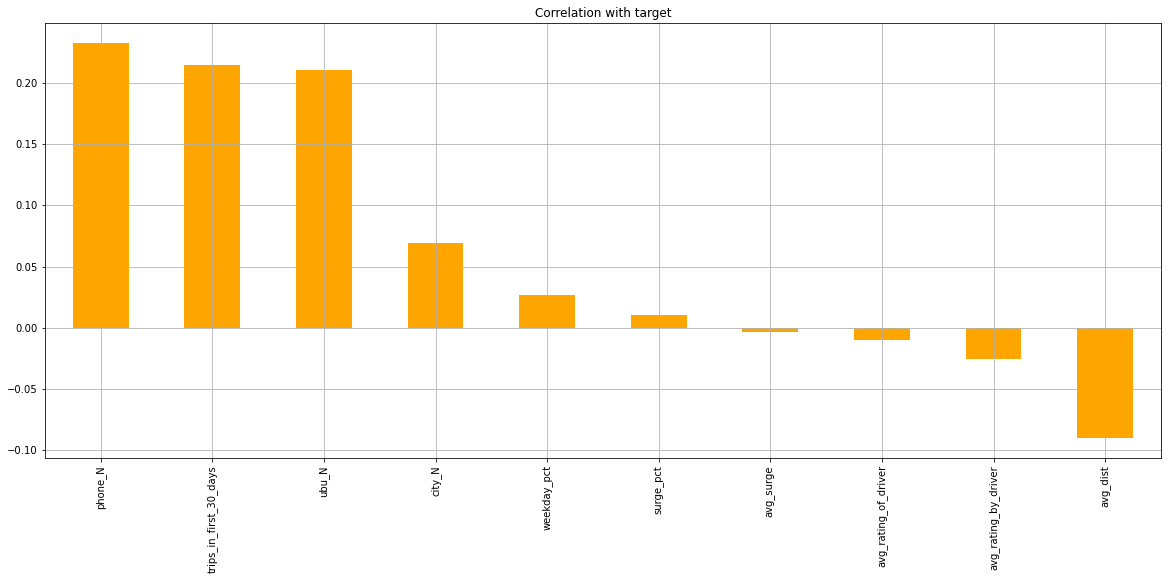

In [113]:
correl=new_df.drop('ret_user', axis=1).corrwith(new_df.ret_user)
df_c = correl.sort_values(ascending=False)
df_c.plot(kind='bar', grid=True, figsize=(20, 8), title="Correlation with target",color="Orange");

 __Comments__
The correlation heatmap shows that weekday_pct, surge_pct,  avg_surge, rating_by_the_driver, rating of_the_driver has a very low correlation


## Modeling

In [129]:
print(new_df.columns)

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'ret_user', 'city_N', 'phone_N', 'ubu_N'],
      dtype='object')


In [130]:
df_all_scaled = new_df.copy()

column = ['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'ret_user', 'city_N', 'phone_N', 'ubu_N']
features_all = df_all_scaled[column]
features_all.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,ret_user,city_N,phone_N,ubu_N
0,4,4.7,1.10,15.4,46.2,3.67,5.0,1,1,2,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,0,0,0,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,0,0,2,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,1,1,2,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,2,0,0


__Scaling the data__

To scale the data the Robust scaler was used 

In [131]:
scaler = RobustScaler()

df_all_scaled[column] = scaler.fit_transform(features_all.values)
df_all_rscaled=df_all_scaled[column]

In [132]:
df_all_rscaled.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,ret_user,city_N,phone_N,ubu_N
0,1.000000,0.0,2.0,1.790698,-0.307346,-0.046460,0.000000,1.0,0.0,0.0,1.0
1,-0.333333,0.6,0.0,0.000000,-0.250375,0.969027,0.000000,0.0,-0.5,-1.0,0.0
2,0.666667,-0.8,0.0,0.000000,0.499250,-0.688053,0.000000,0.0,-0.5,0.0,0.0
3,2.666667,-0.2,2.8,2.325581,0.199400,-0.336283,-0.333333,1.0,0.0,0.0,1.0
4,4.333333,-0.6,3.8,1.372093,0.235382,-0.165929,-0.333333,0.0,0.5,-1.0,0.0


__Analysis of the effect of the features on the Target__

For this analysis we are testing the final selected features without scaling

In [133]:
# defining the dependent and independent variables, droping avg_surge
Xtrain = new_df[['trips_in_first_30_days', 'avg_rating_of_driver',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver','city_N', 'phone_N', 'ubu_N']]
ytrain = new_df[['ret_user']]

In [119]:
# building the model and fitting the data
Xtrain=sm.add_constant(Xtrain)
log_reg_no_scale = sm.Logit(ytrain, Xtrain).fit()

Optimization terminated successfully.
         Current function value: 0.583303
         Iterations 6


In [120]:
# printing the summary table
print(log_reg_no_scale.summary())

                           Logit Regression Results                           
Dep. Variable:               ret_user   No. Observations:                50000
Model:                          Logit   Df Residuals:                    49990
Method:                           MLE   Df Model:                            9
Date:                Tue, 15 Feb 2022   Pseudo R-squ.:                  0.1120
Time:                        15:25:14   Log-Likelihood:                -29165.
converged:                       True   LL-Null:                       -32845.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -2.0465      0.134    -15.217      0.000      -2.310      -1.783
trips_in_first_30_days     0.1180      0.003     35.181      0.000       0.111       0.125
avg_

In [186]:

logreg = {'feature_er': ['trips_in_first_30_days', 'avg_rating_of_driver',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver'],
           'std_error': [0.007,0.0352, 0.0013, 0.0004, 0.0038, 0.0446], 
    'coef': [0.118, 0.0242, 0.0033, 0.0014, -0.0322, -0.0494]} 

dfer = pd.DataFrame(logreg, columns = ['feature_er', 'std_error', 'coef'])

print (dfer)

               feature_er  std_error    coef
0  trips_in_first_30_days     0.0070  0.1180
1    avg_rating_of_driver     0.0352  0.0242
2               surge_pct     0.0013  0.0033
3             weekday_pct     0.0004  0.0014
4                avg_dist     0.0038 -0.0322
5    avg_rating_by_driver     0.0446 -0.0494


In [187]:
x_pos = np.arange(len(logreg['feature_er']))
height = dfer['coef']
error = dfer['std_error']
print(error)

0    0.0070
1    0.0352
2    0.0013
3    0.0004
4    0.0038
5    0.0446
Name: std_error, dtype: float64


<ipython-input-188-c1527f00c8c3>:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


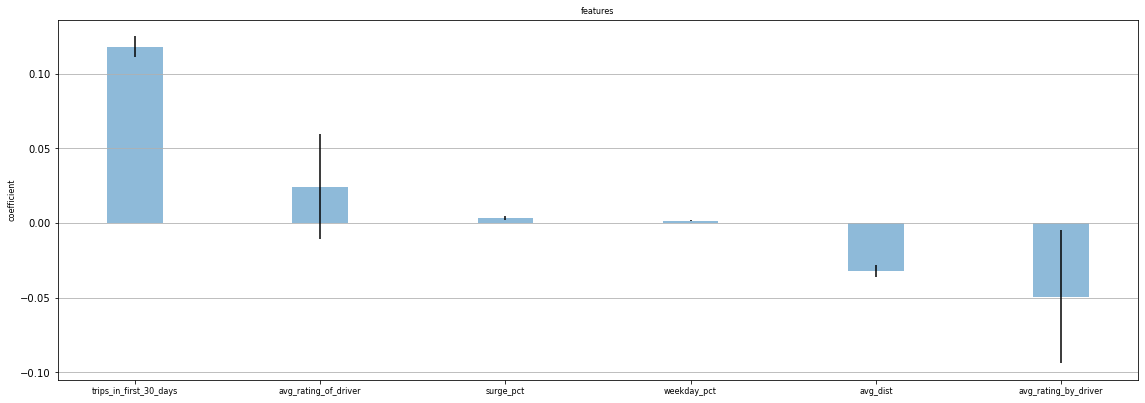

In [188]:
# Build the plot
fig, ax = plt.subplots()
# ax.bar(x_pos, height=height, yerr=error, align='center', alpha=0.5, ecolor='black', capsize=5)
ax = fig.add_axes([0,0,1,1])
ax.bar(x_pos, height=height, yerr=error, align='center', alpha=0.5, ecolor='black',width=0.3)
ax.set_ylabel('coefficient', fontsize=8)
ax.set_xticks(x_pos)
ax.set_xticklabels(dfer.feature_er, fontsize=8)
ax.set_title('features', fontsize=8)
ax.yaxis.grid(True)
plt.rcParams['figure.figsize'] = [15,5]
# Save the figure and show
plt.tight_layout()
plt.savefig('bar_plot_with_error_bars.png')
plt.show()

__Comments__

Using log-odds, we can calculate the increased probability of retained user caused by a one unit increase of any of these features while controlling for the other features present in the regression analysis done here. For example, trips_in_first_30_days has a coefficient of 0.1180  which corresponds to a 13% increased chance of retained user for a single number of trip increase

__Feature of Importance__

In [134]:
Xtrain_all = df_all_rscaled[['trips_in_first_30_days', 'avg_rating_of_driver',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver','city_N', 'phone_N', 'ubu_N']]

In [135]:
Xtrain_all=sm.add_constant(Xtrain_all)

In [136]:
X_all = df_all_rscaled[['trips_in_first_30_days', 'avg_rating_of_driver', 
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver','city_N', 'phone_N', 'ubu_N']]
y_all= df_all_rscaled[['ret_user']]
X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all, y_all, test_size=0.25, random_state=42)

In [137]:
rf_all = RandomForestRegressor(n_estimators=100)
# rf.fit(X_train, y_train)
rf_all.fit(X_train_all, y_train_all.values.ravel())
# model = forest.fit(train_fold, train_y.values.ravel())

RandomForestRegressor()

In [138]:
# To get the feature importances from the Random Forest model use the feature_importances_ attribute:
rf_all.feature_importances_

array([0.07358466, 0.08572794, 0.07575431, 0.12218098, 0.30768394,
       0.18075188, 0.080084  , 0.04423405, 0.02999825])

In [139]:
feature_names = ['trips_in_first_30_days', 'avg_rating_of_driver', 
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver','city_N', 'phone_N', 'ubu_N']
   
# List2
rf_feature_importances_ = [0.07358466, 0.08572794, 0.07575431, 0.12218098, 0.30768394,
       0.18075188, 0.080084  , 0.04423405, 0.02999825]
   
# get the list of tuples from two lists.
# and merge them by using zip().
list_of_tuples = list(zip(feature_names, rf_feature_importances_))
   
# Assign data to tuples.
list_of_tuples 
 
 
# Converting lists of tuples into
# pandas Dataframe.
df_fim = pd.DataFrame(list_of_tuples,
                  columns = ['feature_names', 'rf_feature_importances_'])
df_fim.sort_values(by=['rf_feature_importances_'], inplace=True, ascending=False)   
# Print data.
print(df_fim)

            feature_names  rf_feature_importances_
4                avg_dist                 0.307684
5    avg_rating_by_driver                 0.180752
3             weekday_pct                 0.122181
1    avg_rating_of_driver                 0.085728
6                  city_N                 0.080084
2               surge_pct                 0.075754
0  trips_in_first_30_days                 0.073585
7                 phone_N                 0.044234
8                   ubu_N                 0.029998


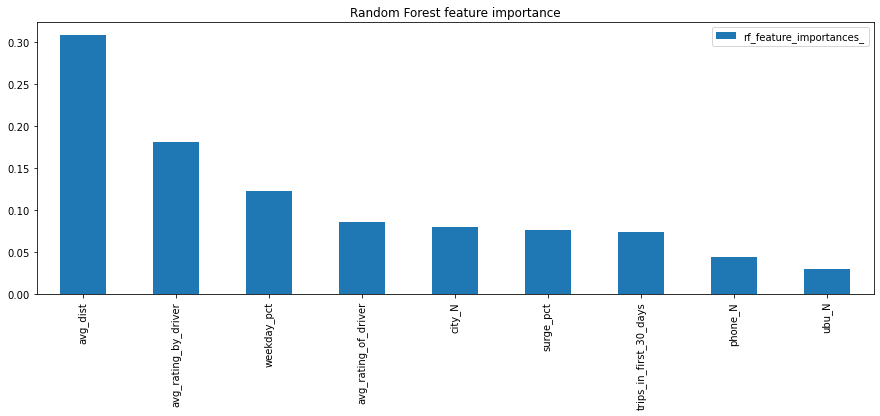

In [140]:
ax = df_fim[['feature_names','rf_feature_importances_']].sort_values(by='rf_feature_importances_',ascending=False).plot(kind='bar')
ax.set_title('Random Forest feature importance')
ax.set_xticklabels(df_fim.feature_names);


__Finding the Best Parameters__

In [141]:
X_all = df_all_rscaled[['trips_in_first_30_days', 'avg_rating_of_driver', 
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver','city_N', 'phone_N', 'ubu_N']]
y_all = df_all_rscaled[['ret_user']]
X_all=sm.add_constant(X_all)

In [142]:
from sklearn.model_selection import GridSearchCV
# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.30, random_state = 42)
#Instantiate the model
rfm_all = RandomForestClassifier()
#Tuning parameters and performing cross-validation
# Setup the hyperparameter grid
#number of trees in Forest
n_estimators = [10, 50, 100, 250, 500]
max_depth = [1, 2, 5, 10, 20, None]
param_grid = {'n_estimators': n_estimators, 'max_depth':max_depth}
# Instantiate the GridSearchCV object: rf_cv
rf_cv_all = GridSearchCV(rfm_all, param_grid, cv=5, scoring='roc_auc')

#Fitting the model
rf_cv_all.fit(X_all_train, y_all_train.values.ravel())

print("Tuned Random Forest Parameters: {}".format(rf_cv_all.best_params_)) 
print("Best score is all features{}".format(rf_cv_all.best_score_))

Tuned Random Forest Parameters: {'max_depth': 10, 'n_estimators': 500}
Best score is all features0.8552802172996474


In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, brier_score_loss, roc_curve, auc
#Instantiate the model with best parameters acquired from GridCV Search
rfm_all = RandomForestClassifier(max_depth=10, n_estimators=500, random_state = 42)
#Fitting the model
rfm_all.fit(X_all_train, y_all_train.values.ravel())


# Scoring with AUC
print('ROC AUC score All Features:', roc_auc_score(y_all_test, rfm_all.predict_proba(X_all_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_all_test, rfm_all.predict_proba(X_all_test)[:, 1])
print("Brier score is all features {}".format(brier_loss))

rf_fpr_all, rf_tpr_all, _ = roc_curve(y_all_test, rfm_all.predict_proba(X_all_test)[:, 1])

ROC AUC score All Features: 0.8514040011640902
Brier score is all features 0.14892583358398387


In [144]:
#Using feature_set1
X_all = df_all_rscaled[['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver','city_N', 'phone_N', 'ubu_N']]
y_all = df_all_rscaled[['ret_user']]
X_all=sm.add_constant(X_all)

# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.30, random_state = 42)


# Setup the hyperparameter grid
c_space = [0.0001, 0.001, .01, .1, .5, 1, 10]
param_grid = {'C': c_space}

# Instantiate a logistic regression classifier: logreg
logreg_all = LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv_all = GridSearchCV(logreg_all, param_grid, cv=5, scoring='roc_auc')

# Fit it to the data
logreg_cv_all.fit(X_all_train,y_all_train.values.ravel())

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv_all.best_params_)) 
print("Best AUC-ROC score is {}".format(logreg_cv_all.best_score_))

# calculate brier score
brier_loss = brier_score_loss(y_all_test, logreg_cv_all.predict_proba(X_all_test)[:, 1])
print("Brier score is {}".format(brier_loss))

#Storing false and true positive rates to plot ROC later
lr_fpr_all, lr_tpr_all, _ = roc_curve(y_all_test, logreg_cv_all.predict_proba(X_all_test)[:, 1])

Tuned Logistic Regression Parameters: {'C': 0.01}
Best AUC-ROC score is 0.7219792505801801
Brier score is 0.1995087630706884


In [145]:
lr_all = LogisticRegression(C = 0.01, random_state = 42).fit(X_all_train, y_all_train.values.ravel())
print('Best ROC AUC:', roc_auc_score(y_all_test, lr_all.predict_proba(X_all_test)[:,1]))

# calculate brier score
brier_loss = brier_score_loss(y_all_test, lr_all.predict_proba(X_all_test)[:, 1])
print("Brier score is {}".format(brier_loss))

lr_fpr_all, lr_tpr_all, _ = roc_curve(y_all_test, lr_all.predict_proba(X_all_test)[:, 1])

Best ROC AUC: 0.7194050781334855
Brier score is 0.1995087630706884


__Model evaluation visualization__

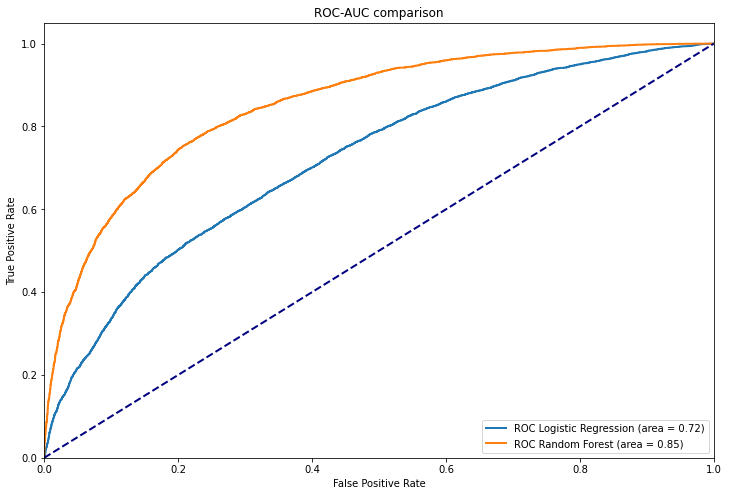

In [146]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(12,8))

for fpr, tpr, model in [(lr_fpr_all,lr_tpr_all,'Logistic Regression'),(rf_fpr_all,rf_tpr_all,'Random Forest')]:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr,
             lw=2, label='ROC '+ model + ' (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC comparison')
plt.legend(loc="lower right")
plt.show()

__Confusion Matrix__

In [147]:
from sklearn.metrics import confusion_matrix, fbeta_score

# #Using the Random Forest Model the confusion matrix is generated
X_all = df_all_rscaled[['trips_in_first_30_days', 'avg_rating_of_driver',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver','city_N', 'phone_N', 'ubu_N']]
y_all = df_all_rscaled[['ret_user']]
X_all = sm.add_constant(X_all)

# Split the data into training and testing sets
X_all_train, X_all_test, y_all_train, y_all_test = train_test_split(X_all, y_all, test_size = 0.30, random_state = 42)
confusion_rf = confusion_matrix(y_all_test, rfm_all.predict(X_all_test))
print(confusion_rf)

[[8256 1267]
 [1975 3502]]


<Figure size 1080x360 with 0 Axes>

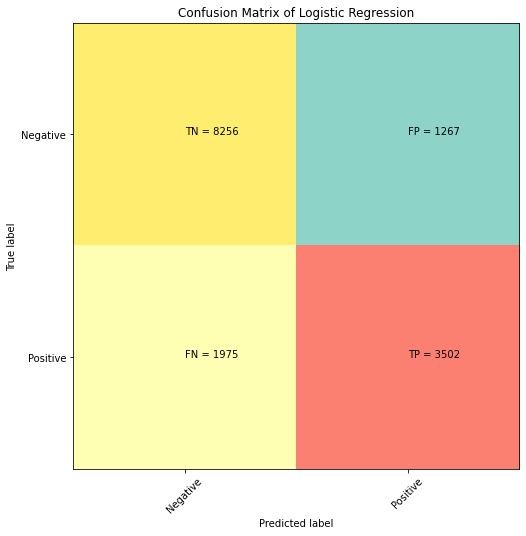

In [148]:
cm = confusion_matrix(y_all_test, rfm_all.predict(X_all_test))
plt.clf()
plt.figure(figsize=(8,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [149]:
from sklearn.metrics import classification_report

def precision_recall(rfm_all, X_all_test, y_all_test, threshold, beta = 2.):
    
    y_all_pred = (rfm_all.predict_proba(X_all_test)[:,1] >= threshold).astype(bool)
    matrix = confusion_matrix(y_all_test, y_all_pred)
    
    #print(threshold,'\n', matrix)
    
    tn = matrix[0,0]# users that were predicted not retained and weren't retained
    tp = matrix[1,1]# users that were predicted to be retained and did
    fp = matrix[0,1]# users that were predicted to be not retained but where retained
    fn = matrix[1,0]# users that were predicted to be not retained but where retained
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    f_beta = fbeta_score(y_all_test, y_all_pred, beta=beta)
    
    return([precision, recall, f_beta])

In [150]:
threshold_df = pd.DataFrame(columns=['Precision','Recall','F_measure'])

for threshold in np.arange(0.1,0.9,0.02):
    
    threshold_df.loc[threshold] = precision_recall(rfm_all, X_all_test, y_all_test, threshold)
 
# print(threshold_df)

Text(0.72, 0.37, 'Optimal Threshold Recall')

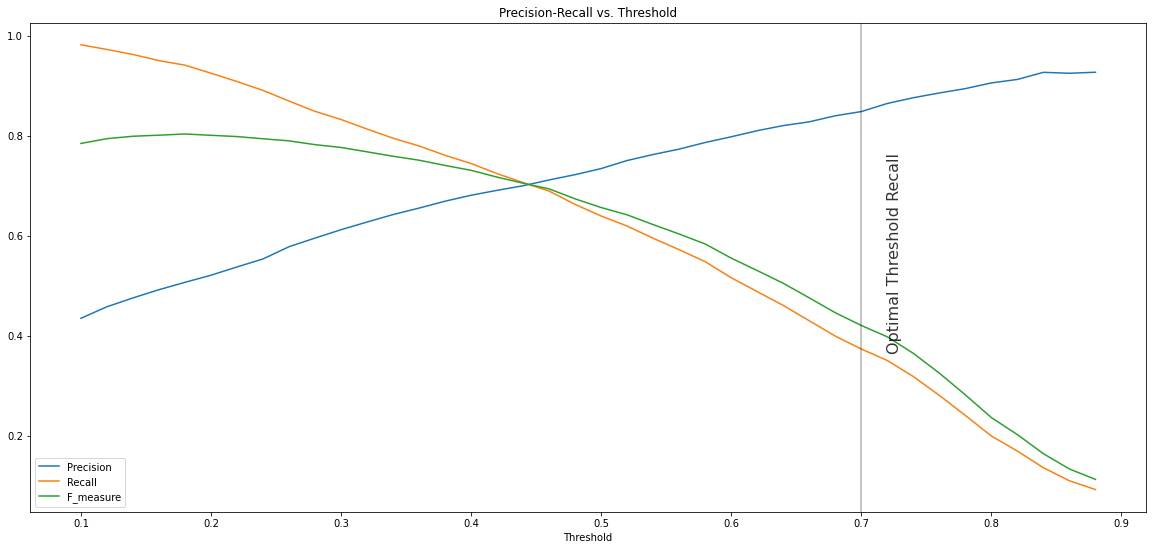

In [193]:
ax = threshold_df.plot(figsize=(20,9))
ax.set_xlabel('Threshold')
ax.set_title('Precision-Recall vs. Threshold')
ax.axvline(0.7, color='black', alpha=0.3)
ax.text(.72,.37,'Optimal Threshold Recall',rotation=90, alpha=0.8, fontsize=16)
# ax.axvline(0.5, color ='black', alpha = 0.3)
# ax.text(.5,.37,'Default Threshold',rotation=90, alpha=0.8,fontsize=16);

__Clasification Report for ALL features__

In [191]:
y_all_pred = (rfm_all.predict_proba(X_all_test)[:,1] >= 0.70).astype(bool)
cm=confusion_matrix(y_all_test, y_all_pred)
print(classification_report(y_all_test,y_all_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.96      0.83      9523
         1.0       0.85      0.37      0.52      5477

    accuracy                           0.75     15000
   macro avg       0.79      0.67      0.67     15000
weighted avg       0.77      0.75      0.72     15000



<Figure size 1080x360 with 0 Axes>

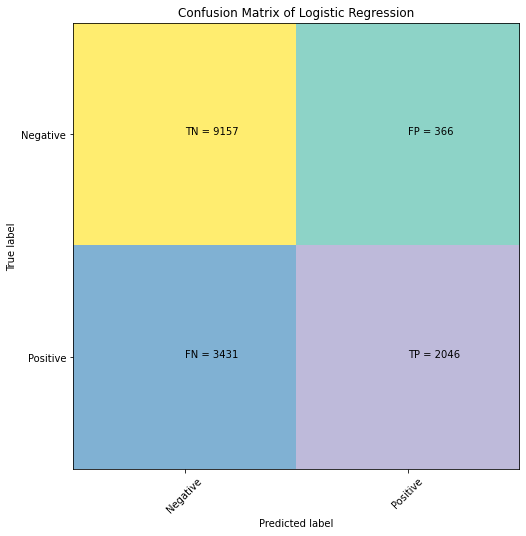

In [192]:
cm = confusion_matrix(y_all_test, y_all_pred)
plt.clf()
plt.figure(figsize=(8,12))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Set3)
classNames = ['Negative','Positive']
plt.title('Confusion Matrix of Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

# Results and Conclusions

__Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice).__

The dataset had missing values for the avg_rating_by_driver and avg_rating_of_driver  which were impute  with the mean value, while the missing type of phone information was replace with other.

The EDA consisted of pie charts representations for the categorical features and histograms for the numerical features.
From the displays the following were the observations:

The pie chart representation was used for the categorical features  visualization. This showed that a 63.4% of the customers were not retained and 36.6% were retained.

The city that has the most customers is Winterfell at 46.7% , followed by Astapor with 33.1% and King’s Landing with 20.3%.
The phone with most users was the iphone at 69.2% followed by 30.0% for Android. The rest has been assigned to other type of phone.
For the ride services, 37.7% of customers took an Ultimate Black in their first 30 days.

The histograms showed:
o	‘trips_in_first_30_days’: Have an exponential decay where, most of the retained customers are in the range of 1-5 trips in the first 30 days after signup.

o	‘avg_rating_by_driver’: Average ratings by driver around 5 showed the most retained customer, ratings of 3 didn’t retain customers.

o	‘avg_rating_of_driver’: Average ratings of driver showed a little wider retained customers with ratings between 3-5.


o	‘avg_distance’: The average distance shows a peak on retained customers for short distances around 5 miles with exponential decay.

o	‘avg_surge’: The average surge multiplier over all of this user trips was around 1 for retained users.


o	‘surge_pct’: The percent of trips taken with surge multiplier > 1 showed a peak at 0 for retained users with a wide distribution.

o	‘weekday_pc’: The percent of the user’s trips occurring during a weekday showed a very wide distribution for retained and not retained users.


o	‘signup_date’: The date of account registration shows some cyclical behavior. There is an increment every 5-7 days that could be weekends for both retained and not retained customers.
The t-test (null hypothesis) showed that avg_surge is statistically no significant for user retention (P-value 0.425). This feature was dropped for the modeling.

__What fraction of the observed users were retained?__
From the definition of a retained customers as the customer that were "active" (i.e., took a trip) in the preceding 30 days there was 36.6% retained. 

__Build a predictive model to help Ultimate determine whether a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.__

To determine whether a user will be active in their 6th month system the random forest feature importance was run to see what features were the most influential in the outcome for a customer to be retained.
The results showed that avg_dist, avg_rating_by_driver, weekday_pct, avg_rating of the driver, trips_in first_30 days were the most important factors.
Two algorithms were tested for the modeling: Logistic Regression and Random Forest.
The cross-validation metrics for the Random Forest was better than the logistic regression . The results showed ROC_AUC score of 0.85 for Random Forest vs 0.72 for Logistic Regression.
It is important to minimize the false positive, so we don’t miss the opportunity of finding ways to retain these customers, so we need a higher precision when choosing the Precision-Recall threshold.

__Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long-term rider retention (again, a few sentences will suffice).__

From the model we saw that some of the most important factors for retaining a customer was the following: rating by the driver, the average distance and weekday_pct. Perhaps evaluate new ways to train the drivers to be better at the interaction with the customers, and maybe offering discounts depending on de distance as well for the ones that use the service regularly during the week.
